In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import interactive
interactive(True)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from data_preprocessing import features_calculation, del_z_outliers
# from renameFeatures import 
from data_preprocessing import reduce_mem_usage, join_events_to_data

random_state = 42

In [2]:
data = pd.read_csv("./full_joined_clean_data_3_7_daysTRAIN11.csv")
# data = data.set_index("time")

# data = data.resample("2Min").interpolate()
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489739 entries, 0 to 489738
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 489739 non-null  int64  
 1   active_power               489739 non-null  float64
 2   electricity_gage           489739 non-null  float64
 3   event_id                   489739 non-null  int64  
 4   frequency                  489739 non-null  float64
 5   intake_pressure            489739 non-null  float64
 6   line_pressure              489739 non-null  float64
 7   liquid_rate                489739 non-null  float64
 8   motor_load                 489739 non-null  float64
 9   pump_temperature           489739 non-null  float64
 10  time                       489739 non-null  object 
 11  voltage_unbalance          489739 non-null  float64
 12  current_unbalance          489739 non-null  float64
 13  voltage                    48

In [4]:
# data = join_events_to_data(data)

In [5]:
data.head()

,Unnamed: 0,active_power,electricity_gage,event_id,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,pump_temperature,...,pump_temperature_rol_mean,pump_temperature_rol_std,pump_temperature_rol_max,pump_temperature_rol_min,pump_temperature_spk,failure_target,Well__1,Well__4,Well__7,Well__8
0,0,82.703800,2184.6,0,120.0,19.323126,16.986563,52.753124,74.345985,92.0,...,91.745636,0.323917,92.0,91.0,1.002773,0,1,0,0,0
1,1,82.702450,2184.6,0,120.0,19.323393,16.988840,52.749107,74.341515,92.0,...,91.745636,0.323917,92.0,91.0,1.002773,0,1,0,0,0
2,2,82.701120,2184.6,0,120.0,19.323660,16.991116,52.745090,74.337050,92.0,...,91.745636,0.323917,92.0,91.0,1.002773,0,1,0,0,0
3,3,82.699776,2184.6,0,120.0,19.323929,16.993393,52.741070,74.332590,92.0,...,91.745636,0.323917,92.0,91.0,1.002773,0,1,0,0,0
4,4,82.698440,2184.6,0,120.0,19.324196,16.995670,52.737053,74.328125,92.0,...,91.745636,0.323917,92.0,91.0,1.002773,0,1,0,0,0


In [6]:
# new_data = features_calculation(data, split=False)

In [7]:
# new_data["event_before"] = (new_data["event_id"].astype(str) + " and 1 day before -- " + new_data["event_id"].shift(-60*14).astype(str))

In [8]:
new_data1 = del_z_outliers(data)
# # new_data1 = new_data.reset_index().rename(columns={"index": "time"}).copy()
# new_data1 = new_data1.dropna()

Initial shape : 489739, outliers : 87431


In [14]:
X, y = new_data1.drop(["failure_target", "Unnamed: 0", "event_id", "time"], axis=1), new_data1["failure_target"]

In [15]:
y.unique()

array([0, 1], dtype=int64)

In [16]:
X = reduce_mem_usage(X)

Mem. usage decreased to 89.01 Mb (51.7% reduction)


In [17]:
n_classes = np.unique(y).size
scaler = StandardScaler()

In [18]:
X_scaled = scaler.fit_transform(X)

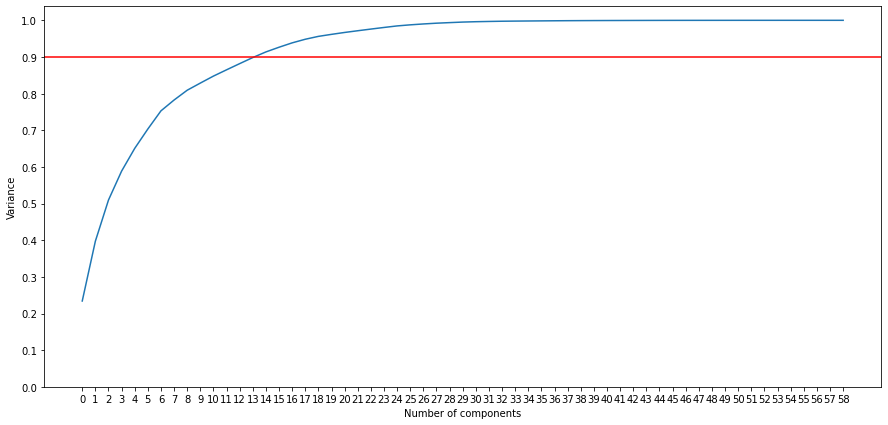

In [19]:
pca_test = PCA(random_state=random_state).fit(X_scaled)
plt.figure(figsize=(15, 7))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')
# plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, X_scaled.shape[1]))
plt.axhline(0.9, c='r')
# plt.axvline(65, c='b')

In [20]:
X.shape

(402308, 59)

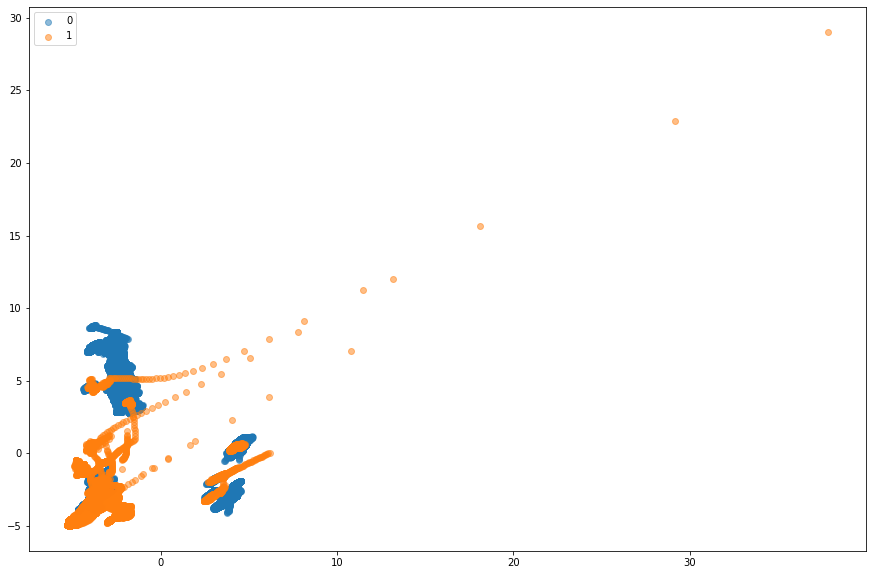

In [21]:
pca_viz = PCA(random_state=random_state, n_components=2)
X_reduced = pca_viz.fit_transform(X_scaled)
plt.figure(figsize=(15, 10))
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, cmap=plt.cm.get_cmap('nipy_spectral', n_classes))
# plt.colorbar()

for label in np.unique(y):
    plt.scatter(X_reduced[y==label, 0], X_reduced[y==label, 1], label=label, alpha=0.5)
plt.legend()

In [22]:
pca_viz = PCA(random_state=random_state, n_components=3)
X_reduced = pca_viz.fit_transform(X_scaled)

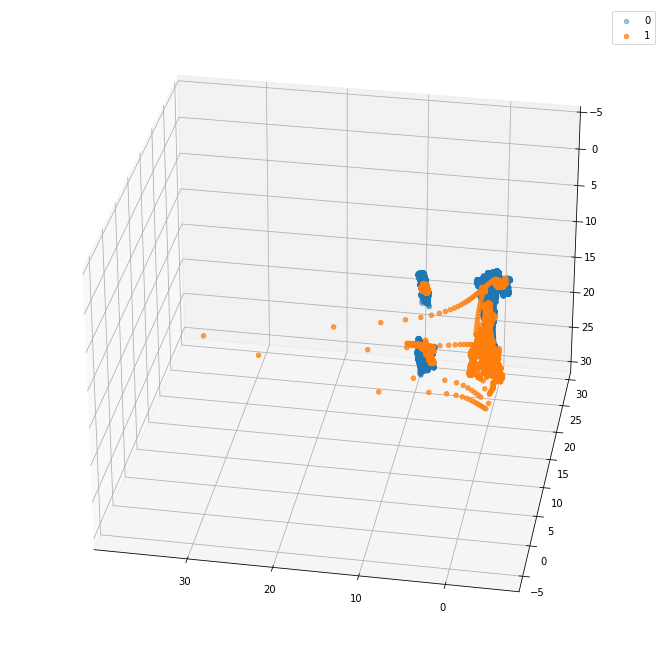

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for label in np.unique(y):
    if label == 0:
        ax.scatter(X_reduced[y==label, 0], X_reduced[y==label, 1], X_reduced[y==label, 2], label=label, alpha=0.4)
    else:
        ax.scatter(X_reduced[y==label, 0], X_reduced[y==label, 1], X_reduced[y==label, 2], label=label, alpha=0.75)
plt.legend()
ax.view_init(-150, 80)
plt.show()

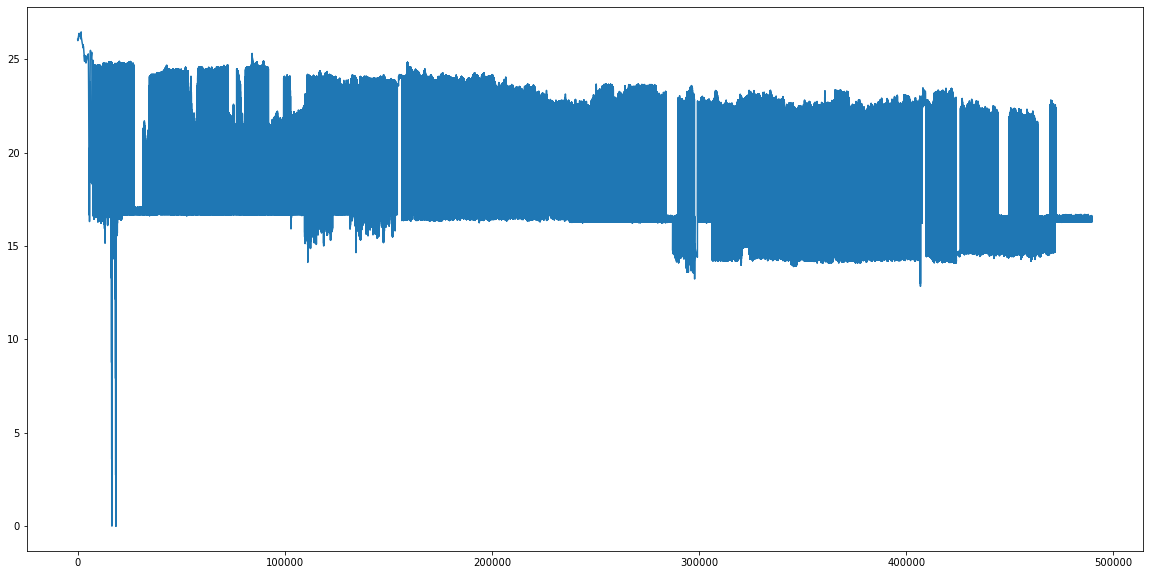

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(data["current"])

In [25]:
# fig = plt.figure(figsize=(5.5, 3))
# ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=48, azim=134)

# pca = PCA(random_state=random_state, n_components=3)
# pca.fit(X)
# X = pca.transform(X)

# labels = y.unique()
# for label in labels:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), label,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Spectral", edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

# colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
# custom_lines = [plt.Line2D([],[], ls="", marker='.', 
#                 mec='k', mfc=c, mew=.1, ms=20) for c in colors]
# ax.legend(custom_lines, [lt for lt in labels], 
#           loc='center left', bbox_to_anchor=(1.0, .5))

# plt.show()

In [26]:
import jep

ImportError: Jep is not supported in standalone Python, it must be embedded in Java.

In [ ]:
import sys

In [ ]:
sys.path

['c:\\Users\\vladv\\predictiveAnalytics\\scripts',
 'C:\\Python\\python39.zip',
 'C:\\Python\\DLLs',
 'C:\\Python\\lib',
 'C:\\Python',
 '',
 'C:\\Python\\lib\\site-packages',
 'C:\\Python\\lib\\site-packages\\win32',
 'C:\\Python\\lib\\site-packages\\win32\\lib',
 'C:\\Python\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\vladv\\.ipython',
 'C:\\Users\\vladv\\AppData\\Roaming\\Python\\Python39\\site-packages']

In [ ]:
import jep

ImportError: Jep is not supported in standalone Python, it must be embedded in Java.